## INSTALL PACKAGES

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 13.1 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade ultralytics ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 MB 30.8 MB/s eta 0:00:00


In [ ]:
!pip install squarify

##IMPORT LIBRARIES

In [ ]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
import numpy as np
import sys
import time
from sklearn.metrics import precision_score, recall_score



sns.set_style('darkgrid')

%matplotlib inline

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

##LOAD DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


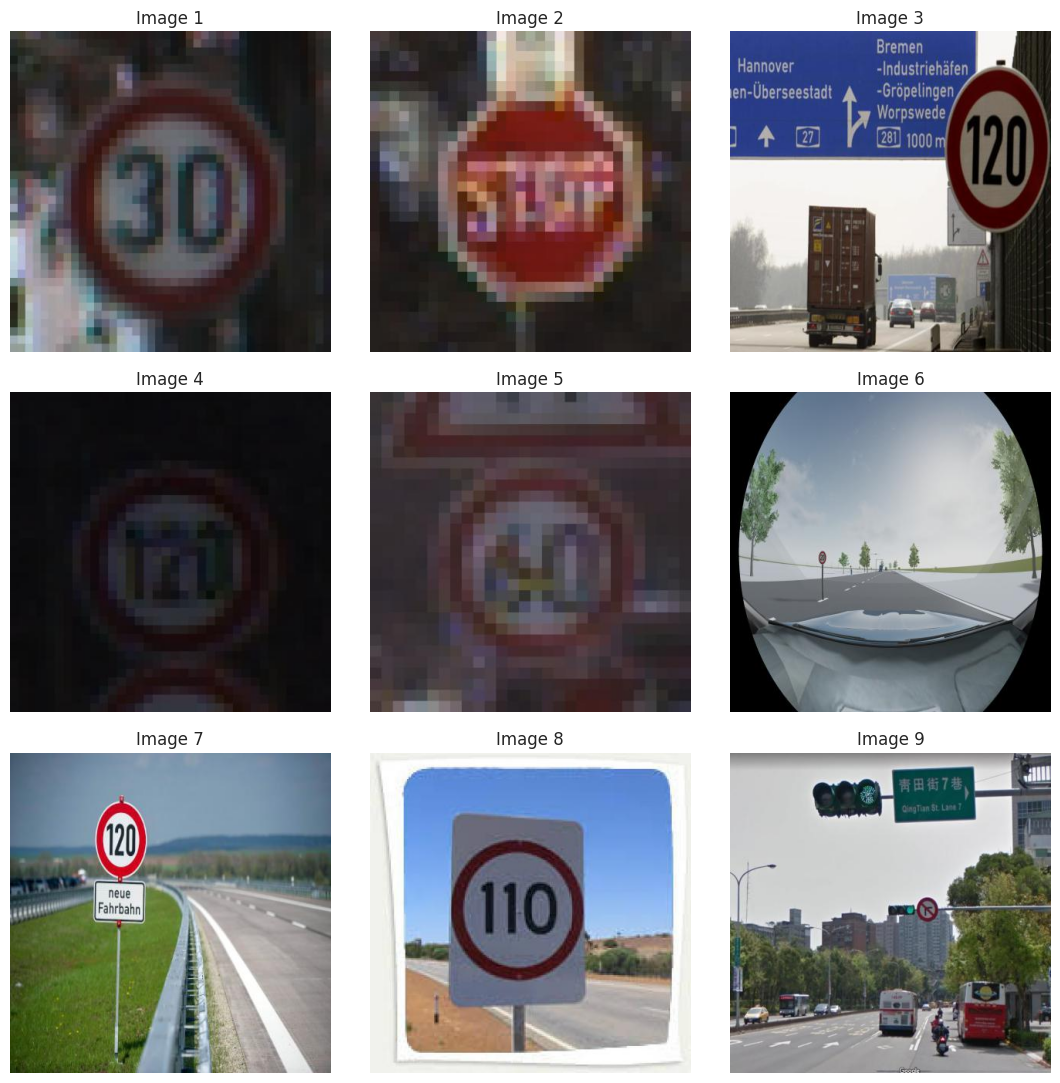

In [ ]:
Image_dir = '/content/drive/MyDrive/car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

##PRE-PROCESS DATASET

In [ ]:

# Define directory and target image size
image_dir = '/content/drive/MyDrive/car/train/images'
target_size = (416, 416)  # Resize to 416x416

# List to store processed images
processed_images = []

# Process images
for image_name in os.listdir(image_dir):
    # Load the image
    img_path = os.path.join(image_dir, image_name)
    image = cv2.imread(img_path)

    if image is not None:
        # Resize image
        image_resized = cv2.resize(image, target_size)

        # Normalize pixel values (0 to 1)
        image_normalized = image_resized / 255.0

        # Append to list
        processed_images.append(image_normalized)
    else:
        print(f"Could not load image {image_name}")

# Convert list to numpy array for model input
processed_images = np.array(processed_images)
print("Processing complete. Shape of processed dataset:", processed_images.shape)


Processing complete. Shape of processed dataset: (3530, 416, 416, 3)


##MODEL BUIDLING

In [ ]:
model = YOLO("yolov8n.pt")


100%|██████████| 6.25M/6.25M [00:00<00:00, 24.5MB/s]


##TRAINING THE MODEL

In [ ]:
Result_Final_model = Final_model.train(data="/content/drive/MyDrive/car/data.yaml",epochs = 30, batch = -1, optimizer = 'auto')

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/car/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

100%|██████████| 755k/755k [00:00<00:00, 4.56MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 22.4MB/s]


AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.75G total, 0.10G reserved, 0.06G allocated, 14.58G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3013773       8.209         0.191         65.21         367.1        (1, 3, 640, 640)                    list
     3013773       16.42         0.296         27.79         55.16        (2, 3, 640, 640)                    list
     3013773       32.84         0.537         23.45         50.49        (4, 3, 640, 640)                    list
     3013773       65.67         0.977         30.31         52.15        (8, 3, 640, 640)                    list
     3013773       131.3         1.906         56.56         64.95       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 75 for CUDA:0 8.82G/14.75G (60%) ✅


train: Scanning /content/drive/MyDrive/car/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005859375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      9.69G     0.8911      3.845      1.225         18        640: 100%|██████████| 48/48 [04:56<00:00,  6.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.01s/it]

                   all        801        944      0.036      0.732      0.116     0.0961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      9.72G     0.7473      2.726      1.088         16        640: 100%|██████████| 48/48 [00:31<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        801        944       0.27      0.461      0.262      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      9.64G     0.7352      2.252      1.081          9        640: 100%|██████████| 48/48 [00:30<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]

                   all        801        944      0.398      0.467      0.427      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      9.64G     0.7231      1.923      1.059          7        640: 100%|██████████| 48/48 [00:31<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        801        944       0.43      0.546      0.478      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      9.64G     0.6765      1.613      1.041         10        640: 100%|██████████| 48/48 [00:31<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        801        944        0.7      0.638      0.729      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      9.69G     0.6601      1.414      1.028         11        640: 100%|██████████| 48/48 [00:30<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        801        944      0.831      0.686       0.79      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      9.63G     0.6623      1.271      1.023          9        640: 100%|██████████| 48/48 [00:31<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        801        944      0.851      0.746      0.833      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      9.62G     0.6363      1.164      1.016         21        640: 100%|██████████| 48/48 [00:30<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        801        944      0.879      0.745      0.848      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      9.72G      0.631      1.098      1.004         11        640: 100%|██████████| 48/48 [00:31<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        801        944       0.87      0.758      0.865      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      9.64G     0.6185      1.005      1.001         15        640: 100%|██████████| 48/48 [00:30<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        801        944      0.906      0.798       0.89      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      9.63G     0.6092     0.9664     0.9933          6        640: 100%|██████████| 48/48 [00:30<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.31it/s]

                   all        801        944      0.898      0.823      0.898      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      9.64G     0.6135     0.9328     0.9951         14        640: 100%|██████████| 48/48 [00:30<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.31it/s]

                   all        801        944      0.905      0.823      0.903      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      9.72G     0.6017     0.8723     0.9958         12        640: 100%|██████████| 48/48 [00:30<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        801        944      0.922      0.815      0.906      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      9.63G     0.5884       0.86      0.988         10        640: 100%|██████████| 48/48 [00:30<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        801        944      0.881      0.849      0.901      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      9.64G     0.5839     0.8283      0.983         13        640: 100%|██████████| 48/48 [00:30<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        801        944      0.925      0.839      0.928      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      9.69G     0.5688     0.7908     0.9804         16        640: 100%|██████████| 48/48 [00:31<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        801        944      0.903      0.804      0.906      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      9.64G     0.5689     0.7589     0.9744          8        640: 100%|██████████| 48/48 [00:30<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        801        944      0.911      0.876      0.937      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      9.66G     0.5606      0.736     0.9723         12        640: 100%|██████████| 48/48 [00:30<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]

                   all        801        944      0.908       0.87      0.938      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      9.64G     0.5536     0.7129     0.9678          9        640: 100%|██████████| 48/48 [00:30<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        801        944      0.921      0.849      0.933      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      9.64G     0.5494     0.6916      0.965         10        640: 100%|██████████| 48/48 [00:30<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        801        944      0.942      0.881      0.944      0.808


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      9.62G     0.5672     0.5362     0.9423          7        640: 100%|██████████| 48/48 [00:34<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        801        944      0.918      0.868      0.943      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      9.58G     0.5509     0.5214     0.9358          6        640: 100%|██████████| 48/48 [00:30<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        801        944       0.91      0.883      0.944      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      9.62G     0.5397     0.4817     0.9314          7        640: 100%|██████████| 48/48 [00:30<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]

                   all        801        944      0.925      0.871      0.942       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      9.58G     0.5315     0.4713     0.9262          5        640: 100%|██████████| 48/48 [00:30<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]

                   all        801        944      0.937      0.871      0.948      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      9.69G     0.5282     0.4492     0.9255          7        640: 100%|██████████| 48/48 [00:30<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]

                   all        801        944      0.945      0.889      0.953      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      9.62G     0.5101     0.4295     0.9213          5        640: 100%|██████████| 48/48 [00:30<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]

                   all        801        944      0.958      0.874      0.955      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      9.58G     0.5135     0.4156     0.9098          9        640: 100%|██████████| 48/48 [00:30<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]

                   all        801        944      0.962      0.888      0.953      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      9.62G     0.4992        0.4      0.912          5        640: 100%|██████████| 48/48 [00:30<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        801        944      0.942       0.89      0.951      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      9.58G     0.4951     0.3906     0.9052          7        640: 100%|██████████| 48/48 [00:30<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        801        944      0.946      0.895      0.954      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      9.58G     0.4902     0.3808     0.8991          5        640: 100%|██████████| 48/48 [00:30<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        801        944      0.952      0.892      0.956      0.834



30 epochs completed in 0.380 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.08it/s]


                   all        801        944      0.952      0.892      0.956      0.833
           Green Light         87        122      0.876      0.713      0.837      0.507
             Red Light         74        108      0.925      0.688      0.841      0.527
       Speed Limit 100         52         52      0.976      0.962       0.99      0.913
       Speed Limit 110         17         17      0.857      0.882      0.928      0.863
       Speed Limit 120         60         60          1      0.965       0.99      0.932
        Speed Limit 20         56         56      0.984      0.982      0.986      0.879
        Speed Limit 30         71         74      0.916      0.946      0.987      0.922
        Speed Limit 40         53         55      0.964      0.945      0.989      0.891
        Speed Limit 50         68         71      0.984      0.868      0.963      0.861
        Speed Limit 60         76         76      0.979      0.908      0.965      0.872
        Speed Limit 7

In [ ]:
# Save the trained model
Final_model.save("/content/drive/MyDrive/car/yolov8_trained_model.pt")
print("Model saved successfully to /content/drive/MyDrive/car/yolov8_trained_model.pt")


Model saved successfully to /content/drive/MyDrive/car/yolov8_trained_model.pt


##TEST THE MODEL


image 1/1 /content/drive/MyDrive/car/test/images/00001_00011_00006_png.rf.b3c9ed7b58e8b06312406f5fb6ecb9cd.jpg: 416x416 1 Speed Limit 30, 10.8ms
Speed: 1.2ms preprocess, 10.8ms inference, 3.3ms postprocess per image at shape (1, 3, 416, 416)


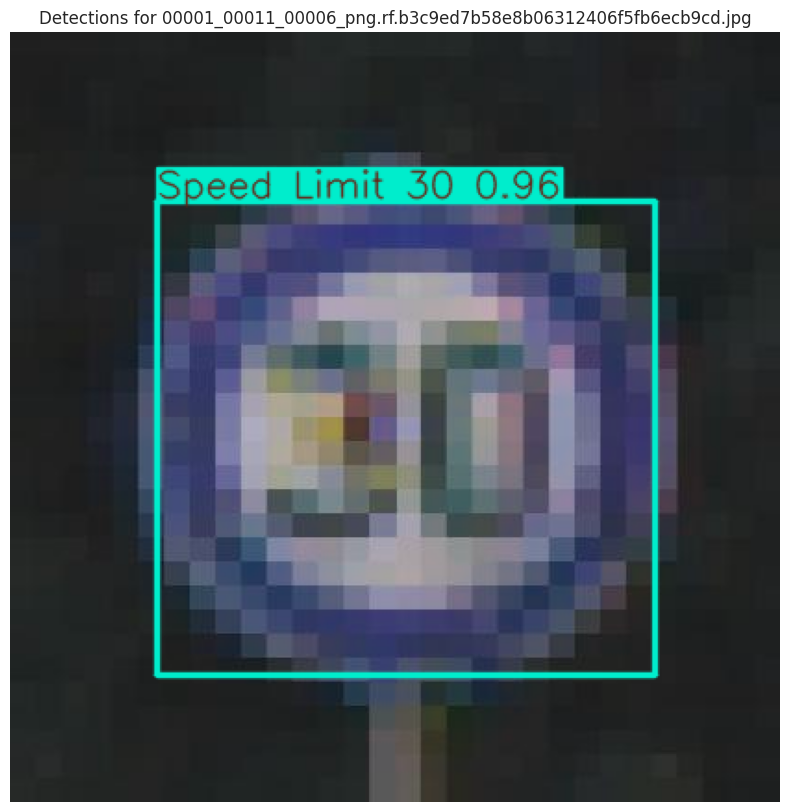


image 1/1 /content/drive/MyDrive/car/test/images/00000_00000_00008_png.rf.ff305dcd6e9ceb9188937311a4a1b207.jpg: 416x416 1 Speed Limit 20, 9.0ms
Speed: 1.2ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)


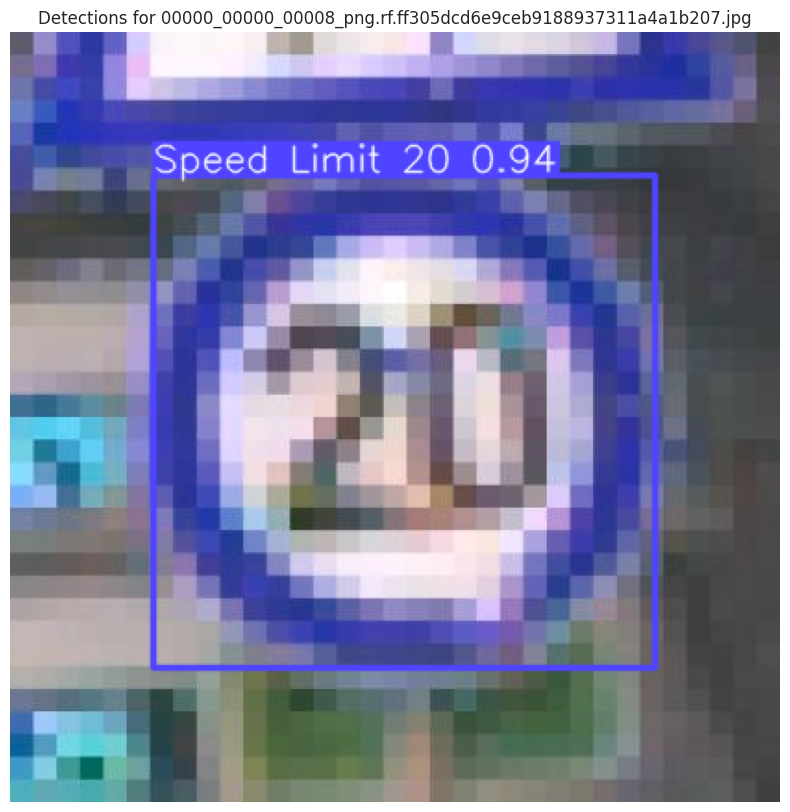


image 1/1 /content/drive/MyDrive/car/test/images/00000_00000_00005_png.rf.ab60a274676963d378f5014e89d9e2b1.jpg: 416x416 1 Speed Limit 20, 7.7ms
Speed: 1.0ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)


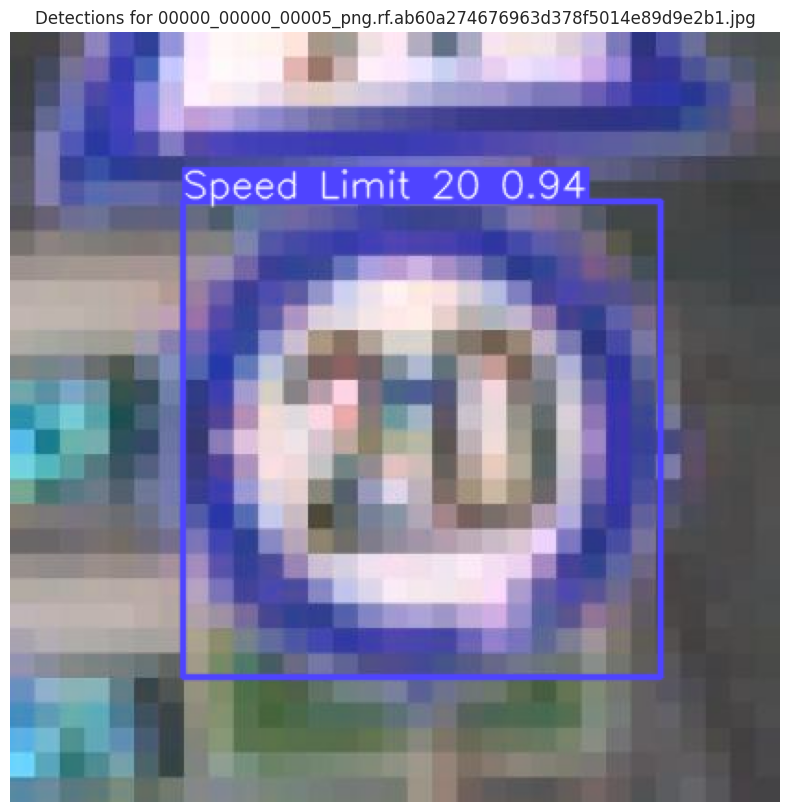


image 1/1 /content/drive/MyDrive/car/test/images/00003_00014_00015_png.rf.4a4854b32d96279361db09f8b4d4bbcf.jpg: 416x416 1 Speed Limit 60, 10.1ms
Speed: 1.2ms preprocess, 10.1ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 416)


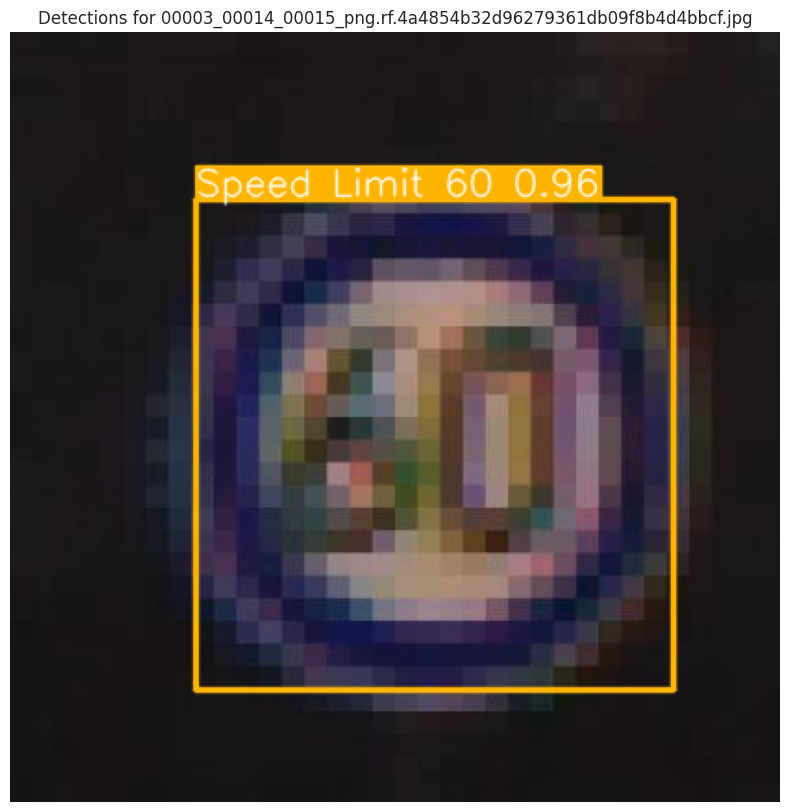


image 1/1 /content/drive/MyDrive/car/test/images/00003_00002_00023_png.rf.4d47dbf061aedff7277a91be6a5bbc6b.jpg: 416x416 1 Speed Limit 60, 7.8ms
Speed: 1.2ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)


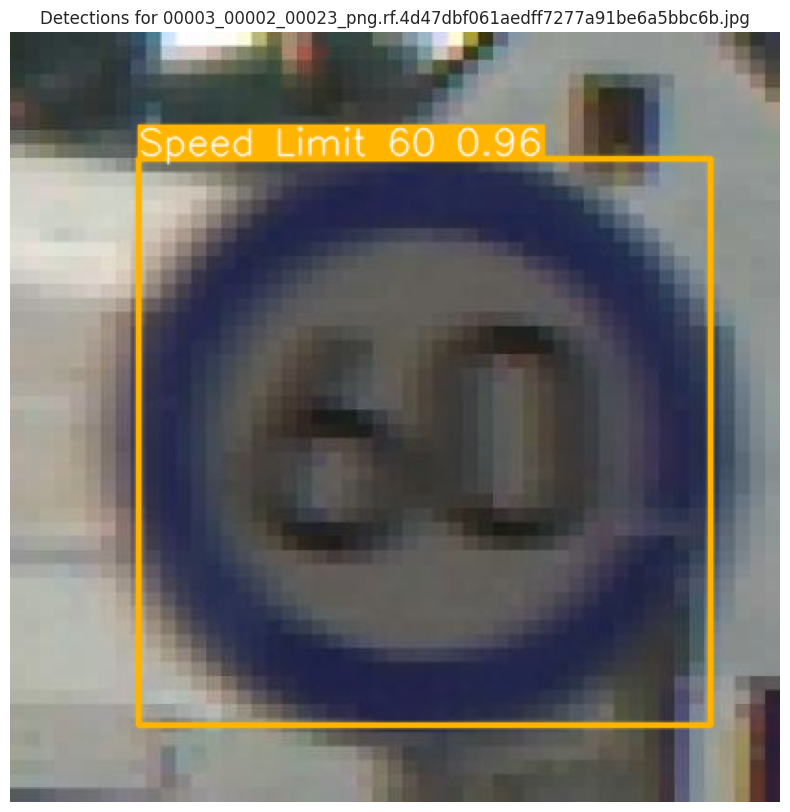

In [ ]:
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
from PIL import Image

# Load the trained YOLOv8 model
model_path = "/content/drive/MyDrive/car/yolov8_trained_model.pt"
model = YOLO(model_path)

# Define test image directory
test_image_dir = "/content/drive/MyDrive/car/test/images"

# List all test images
test_images = os.listdir(test_image_dir)

# Select a few test images for visualization
sample_images = test_images[:5]  # Change number as needed

# Run inference on sample test images and display results
for image_name in sample_images:
    image_path = os.path.join(test_image_dir, image_name)

    # Make predictions on the test image
    results = model.predict(source=image_path, imgsz=416, conf=0.25)  # Adjust confidence threshold as needed

    # Display the image with bounding boxes and labels
    plt.figure(figsize=(10, 10))

    # Get the plotted image as a NumPy array
    plot = results[0].plot()

    # Convert the NumPy array to a PIL Image object
    plot = Image.fromarray(plot)

    # Now you can convert to RGB if needed
    plot = plot.convert("RGB")

    plt.imshow(plot)
    plt.axis("off")
    plt.title(f"Detections for {image_name}")
    plt.show()


##MODEL EVALUATION

In [ ]:
# Display evaluation metrics
print("Test Set Evaluation Metrics:")
print(f"Precision: {metrics.box.map50:.3f}")          # Precision at IoU threshold 0.5
print(f"Recall: {metrics.box.map75:.3f}")             # Recall at IoU threshold 0.75
print(f"mAP@50: {metrics.box.map50:.3f}")             # mAP at IoU threshold 0.5
print(f"mAP@50-95: {metrics.box.map:.3f}")            # Average mAP over IoU thresholds from 0.5 to 0.95

# Displaying average inference speed per image
# Extract the inference speed from the metrics.speed dictionary
preprocess_time = metrics.speed['preprocess']
inference_time = metrics.speed['inference']
postprocess_time = metrics.speed['postprocess']

print("Average Inference Speed:")
print(f"Preprocessing: {preprocess_time:.3f} ms per image")
print(f"Inference: {inference_time:.3f} ms per image")
print(f"Postprocessing: {postprocess_time:.3f} ms per image")

Test Set Evaluation Metrics:
Precision: 0.934
Recall: 0.889
mAP@50: 0.934
mAP@50-95: 0.801
Average Inference Speed:
Preprocessing: 0.238 ms per image
Inference: 3.736 ms per image
Postprocessing: 1.482 ms per image
